#Chlorophyll-A retreival

by Anastase Charantonis (anastase.charantonis@ensiie.fr)

  (ENSIIE, LiP6, LOCEAN)

If you are running the program through google colab, you need to  use the  following block to load the data, as well as add the .mat files found [here](https://drive.google.com/drive/folders/1-nDvm4kD645jlpQ4I_Bjq8PgwJC2V5qR?usp=sharing) to your good drive (it is a modified som library).

If you are running the code on your own pc, download all the *.mat files above, as well as all the files in this [folder](https://drive.google.com/drive/folders/1L2zpV0vVYbt8k-YvRCPHs-MLXiSV5Igk?usp=sharing) and you can then add path as shown below, by replacing the location "/content/gdrive/MyDrive/TP_SOM_CHL/SOMAPY/" to your path of choice.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1FhRWpd9B8B6RCyyW16ryZk8ZsitzV_rE"})   
downloaded.GetContentFile('VectLB19922008.mat')
    

import sys

#the toolbox path (leave it as is if you are on google colab, change it to where you downloaded the data and the file otherwise)

#!pip install git+https://github.com/sevamoo/SOMPY.git was the inspiration for this toolbox
sys.path.append('/content/gdrive/MyDrive/TP_SOM_CHL/SOMAPY')
import sompy

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


ModuleNotFoundError: ignored

Satellite observations provide us with the values of different biogeochemical parameters at the
surface layer of the ocean. These observations are highly correlated with the underlying vertical
profiles of different oceanic parameters, such as the Chlorophyll-A concentration, the salinity and
temperature of the water column... The sea-surface data and the vertical profiles of the oceanic
parameters constitute multi-dimensional vectors. Due to their multi-dimensionality and the high
complexity of the dynamics connecting these data sets, their links cannot be modeled linearly. In this practical we will attempt to retreive the vertical distribution of Chlorophyll-A using self-organising maps.

Outputs of the bio-géochemical model Nemo – Pisces (courtesy of L.Bopp and M.Levy):
* Vertical profiles of Chlorophylle-A (18 depths).
* Vertical profiles of temperature (18 depths).
* Sea Surface Height (SSH).

Model forcings:
* Short-wave radiation (SR)
* Wind Intensity

Period spanning from 1992 to 2008, averaged every 5 days (connected to satellite revisit period) corresponding to 1241 temporal steps.

The location of the data is seen here: 

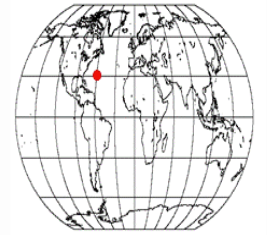

BATS (32°N –64°W) Bermuda Atlantic Time Series




We load the data:

In [ ]:
import scipy.io as sp
mat = sp.loadmat('VectLB19922008.mat') 

Vect=mat['Vect']

depth = mat['depth']


import pandas as pd

columns = ['SSH', 'CC', 'WS', 'SR','THERM 1', 'THERM 2', 'THERM 3', 'THERM 4', 'THERM 5', 'THERM 6', 'THERM 7', 'THERM 8', 'THERM 9', 'THERM 10', 'THERM 11', 'THERM 12', 'THERM 13', 'THERM 14', 'THERM 15', 'THERM 16', 'THERM 17', 'THERM 18', 'CHL 1', 'CHL 2', 'CHL 3', 'CHL 4', 'CHL 5', 'CHL 6', 'CHL 7', 'CHL 8', 'CHL 9', 'CHL 10', 'CHL 11', 'CHL 12', 'CHL 13', 'CHL 14', 'CHL 15', 'CHL 16', 'CHL 17', 'CHL 18', '5days', 'year', 'latitude', 'longitude']

df_train = pd.DataFrame(Vect, columns=columns)

df_train

,SSH,CC,WS,SR,THERM 1,THERM 2,THERM 3,THERM 4,THERM 5,THERM 6,...,CHL 13,CHL 14,CHL 15,CHL 16,CHL 17,CHL 18,5days,year,latitude,longitude
0,-0.735771,0.685744,10.808888,79.320175,22.302101,22.302172,22.302237,22.302296,22.302349,22.302397,...,0.274093,0.271277,0.252274,0.106450,0.061239,0.026978,1.0,1992.0,32.102028,-66.012283
1,-0.750326,0.616595,10.851874,78.684364,22.374134,22.374218,22.374294,22.374367,22.374432,22.374491,...,0.290743,0.290698,0.290654,0.193018,0.054041,0.024201,1.0,1992.0,33.749451,-66.021591
2,-0.822147,0.654812,10.611087,70.748405,22.120571,22.120655,22.120733,22.120806,22.120872,22.120935,...,0.295451,0.295402,0.295352,0.275510,0.052308,0.021057,1.0,1992.0,35.357800,-66.035255
3,-0.752701,0.680498,10.835078,79.649223,22.039080,22.039141,22.039196,22.039246,22.039289,22.039330,...,0.273070,0.261772,0.177656,0.097572,0.062107,0.029364,1.0,1992.0,32.108505,-64.012466
4,-0.766013,0.604020,11.171999,79.554581,21.980213,21.980289,21.980360,21.980425,21.980486,21.980539,...,0.280500,0.280458,0.280416,0.210504,0.058609,0.025778,1.0,1992.0,33.759125,-64.021912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,-0.671495,0.536072,7.678715,83.032242,22.466406,22.466467,22.466524,22.466576,22.466623,22.466667,...,0.265877,0.265848,0.251948,0.103802,0.060930,0.028060,73.0,2008.0,33.759125,-64.021912
11165,-0.764530,0.510693,8.985644,78.771759,22.202244,22.202316,22.202383,22.202444,22.202501,22.202553,...,0.326061,0.326030,0.325719,0.099021,0.042514,0.021365,73.0,2008.0,35.371460,-64.035797
11166,-0.694624,0.504283,6.886647,91.269196,22.049582,22.049627,22.049667,22.049704,22.049734,22.049763,...,0.214373,0.161591,0.127115,0.106238,0.080310,0.038628,73.0,2008.0,32.115047,-62.012562
11167,-0.696401,0.580518,7.754367,80.193146,22.093933,22.093994,22.094049,22.094101,22.094147,22.094191,...,0.248778,0.248754,0.223747,0.106245,0.067321,0.030828,73.0,2008.0,33.768894,-62.022095


VectLB19922008 cpntains the following variables:

{'SSH', 'CC', 'WS', 'SR', 'SST','THERM 1', 'THERM 2', 'THERM 3', 'THERM 4', 'THERM 5',...
        'THERM 6', 'THERM 7', 'THERM 8', 'THERM 9', 'THERM 10', 'THERM 11', 'THERM 12',...
        'THERM 13', 'THERM 14', 'THERM 15', 'THERM 16', 'THERM 17', 'THERM 18', 'CHL 1',...
        'CHL 2', 'CHL 3', 'CHL 4', 'CHL 5', 'CHL 6', 'CHL 7', 'CHL 8', 'CHL 9', 'CHL 10',...
        'CHL 11', 'CHL 12', 'CHL 13', 'CHL 14', 'CHL 15', 'CHL 16', 'CHL 17', 'CHL 18', ...
        '5days', 'year', 'latitude', 'longitude'}

    %    i      | no. of 5 day step
    %    k      | no. year
    %    CHLORO | DCHL + NCHL  in [ng/l].
    %    SSH    | sea surface elevation
    %    CC     | cloud cover
    %    WS     | wind speed
    %    SR     | shortwave radiation
    %    Therm  | vertical thermic profile

Toidentify the data that belong to BATS, we need to filter them through latitude and longitude: 
usable=find((Vect(:,end) <= -63) & (Vect(:,end) >= -65) & (Vect(:,end-1)) >= 31 & (Vect(:,end-1) <= 33));

Depth provides the depth in meters.


In [ ]:
bats  = df_train.loc[(df_train['longitude'] >= -65) & (df_train['longitude'] <= -63) & (df_train['latitude'] >= 31) & (df_train['latitude'] <= 33)]
bats.sort_values(by=['year','5days'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Let us examine one profile of Chlorophyll-A and one of Temperature.

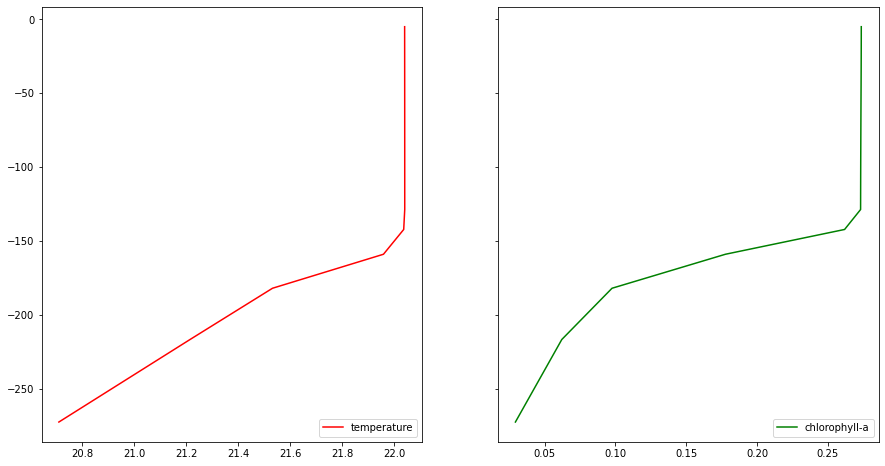

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

tmp0=bats.values[0,4:22]
tmp1=bats.values[0,22:40]
fig,ax = plt.subplots(figsize=[15,8],ncols=2,sharey=True)
ax[0].plot(tmp0,-1*depth[0:18],label='temperature',color='r')
ax[0].legend(loc=4)
ax[1].plot(tmp1,-1*depth[0:18],label='chlorophyll-a',color='g')
ax[1].legend(loc=4)


Let us also examine a year, here 1992.

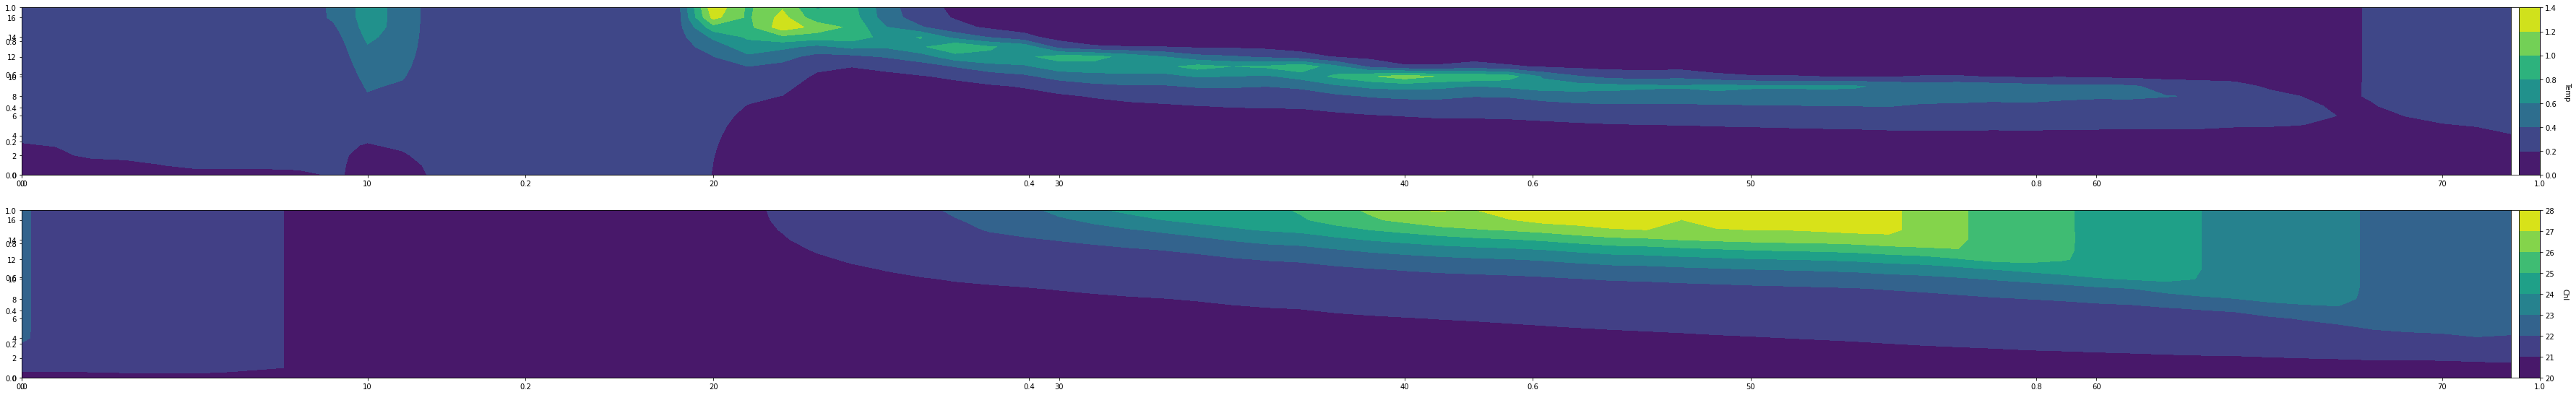

In [ ]:
tmp2=bats.values[0:73,4:22]
tmp3=bats.values[0:73,22:40]
fig2,ax2 = plt.subplots(figsize=[50,8],nrows=2,sharey=True)

#ax2[0].contourf(np.flip(np.transpose(tmp2),axis=0),nchunk=40)

#ax2[1].contourf(np.flip(np.transpose(tmp3),axis=0),nchunk=40)
gs = mpl.gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[60, 0.5])
ax1 = fig2.add_subplot(gs[1, 0])
ax2 = fig2.add_subplot(gs[0, 0], sharex=ax1)
ax3 = fig2.add_subplot(gs[0, 1])
ax4 = fig2.add_subplot(gs[1, 1])


cont = ax1.contourf(np.flip(np.transpose(tmp2),axis=0),nchunk=40)
cont2 = ax2.contourf(np.flip(np.transpose(tmp3),axis=0),nchunk=40)

cbar = plt.colorbar(cont, cax=ax4)
cbar.set_label('Chl', rotation=270, labelpad=20)
cbar2 = plt.colorbar(cont2, cax=ax3)
cbar2.set_label('Temp', rotation=270, labelpad=20)
plt.tight_layout()
plt.show()